## Problem Set 2 - Ryan Yordanoff - BF550

# Problem 1

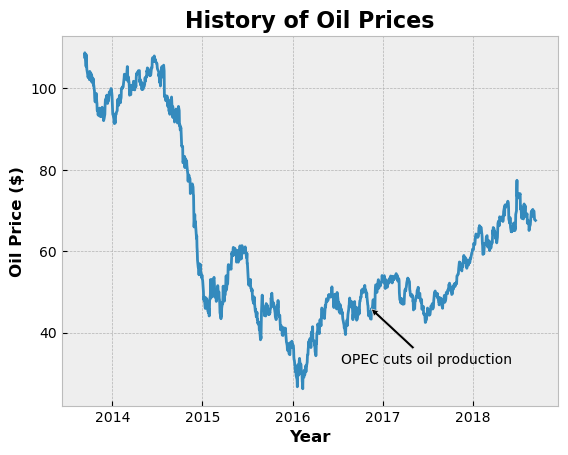

In [13]:
#After speaking with Alex, if code in jupyternb, doesn't need to be all functions/classes

import matplotlib.pyplot as plt
import datetime as dt

dates = [] #x-axis data
prices = [] #y-axis data

#opens .csv and extracts x-axis and y-axis data while ignoring non-relevant entries
with open('oil_price.csv') as f:
    for i in f.readlines():
        if i[11:-1] != '.' and i[11:-1] != 'TICO': #x-axis data
            dates.append(i[0:10])
        if i[11:-1] != '.' and i[11:-1] != 'TICO' : #y-axis data
            prices.append(float(i[11:-1]))

#converts dates to datetime format needed for matplotlib
dt_dates_list = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in dates]

#Line plot and plot specifications/annotations
plt.plot(dt_dates_list, prices)
plt.style.use('bmh')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Oil Price ($)', fontweight='bold')
plt.title('History of Oil Prices', fontweight='bold', fontsize = 16)
plt.annotate('OPEC cuts oil production', xy=(.65,.325), xycoords ='figure fraction', xytext=(.6,.2), textcoords = 'figure fraction', arrowprops= dict(arrowstyle = 'simple', facecolor='black') )
#source for annotation https://www.cnbc.com/2016/11/30/opec-reportedly-reaches-agreement-to-cut-oil-production.html

plt.show()

# Problem 2

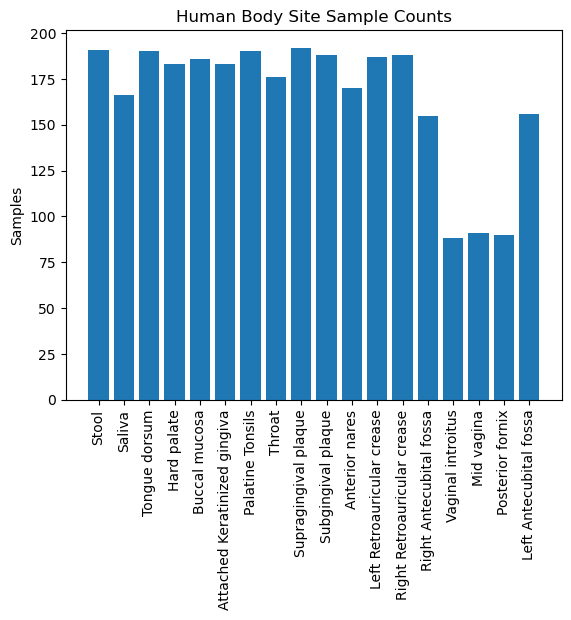

In [11]:
#Problem 2 Part 1
#data from https://hmpdacc.org/hmp/HMQCP/ and download the mapping file for v13 region

#initialize variables for loading data from file
raw_lines = []
split_lines = []

#adding all lines of data file to a list
with open('v13_map_uniquebyPSN.txt') as f:
    for line in f:
            raw_lines.append(line)            

#processing raw_lines to be a new tab delimited list
for i in raw_lines:
    split_lines.append(i.split('\t'))


#creates a dictionary with keys being body sites (str) and values being SampleID (list of str)
body_sites = {}

for i in split_lines:
    if i[5] in body_sites:
        body_sites[i[5]].append(i[0]) #only adding sampleID column

    else:
        body_sites[i[5]] = []
        body_sites[i[5]].append(i[0])

#removes the header data from file
body_sites.pop('HMPbodysubsite')


#bar plot data
body_sites_xaxis = [i.replace('_', ' ') for i in body_sites.keys()] #x-axis data
body_sites_yaxis = [len(i) for i in body_sites.values()] #y-axis data

#Bar plot and plot specifications/annotations
plt.bar(body_sites_xaxis, body_sites_yaxis)
plt.xticks(rotation = 90) #rotates text 90 degrees for x-labels
plt.style.use('default')
plt.ylabel('Samples')
plt.title('Human Body Site Sample Counts')
plt.show()

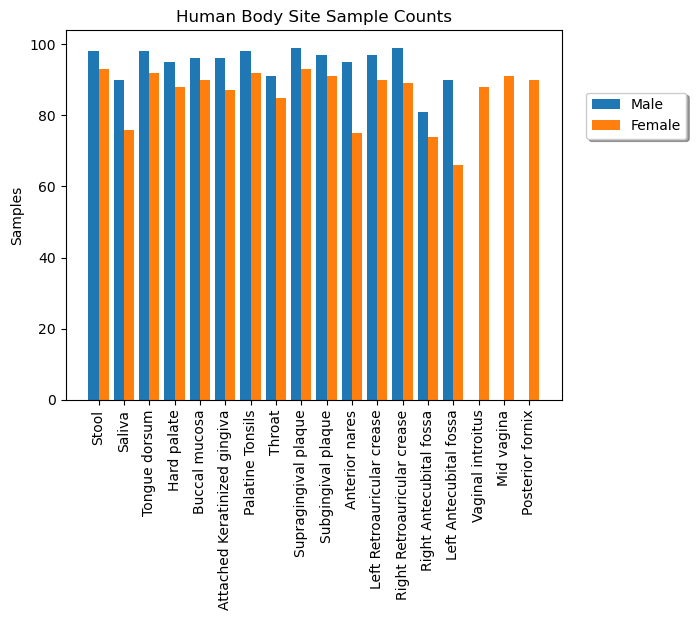

In [3]:
#Problem 2 Part 2

#initialize variables for loading data from file
raw_lines = []
split_lines = []

#adding all lines of data file to a list
with open('v13_map_uniquebyPSN.txt') as f:
    for line in f:
            raw_lines.append(line)            

#processing raw_lines to be a new tab delimited list
for i in raw_lines:
    split_lines.append(i.split('\t'))

#further processing data to create Male and Female specific data variables in dictionaries with key:string & value:list of strings
body_sites_males = {}
body_sites_females = {}

for i in split_lines:
    #male
    if i[3] == 'male':
        if i[5] in body_sites_males:
            body_sites_males[i[5]].append(i[0]) #only for adding sampleID column

        else:
            body_sites_males[i[5]] = []
            body_sites_males[i[5]].append(i[0])
    #female
    elif i[3] == 'female':
        if i[5] in body_sites_females:
            body_sites_females[i[5]].append(i[0]) #only for adding sampleID column

        else:
            body_sites_females[i[5]] = []
            body_sites_females[i[5]].append(i[0])


#Male Bar Plot Data
body_sites_M_xaxis = [i.replace('_', ' ') for i in body_sites_males.keys()] #x-axis data
body_sites_M_yaxis = [len(i) for i in body_sites_males.values()] #y-axis data

#Female Bar Plot Data
body_sites_F_xaxis = [i.replace('_', ' ') for i in body_sites_females.keys()] #x-axis data
body_sites_F_yaxis = [len(i) for i in body_sites_females.values()] #y-axis data

#Dual label bar plot and plot specifications/annotations
plt.bar(body_sites_M_xaxis, body_sites_M_yaxis, width=-0.4, align='edge', label='Male') #Male data left from center of x-tick
plt.bar(body_sites_F_xaxis, body_sites_F_yaxis, width=0.4, align='edge', label='Female') #Female data right from center of x-tick
plt.xticks(rotation = 90) #rotates text 90 degrees for x-labels
plt.ylabel('Samples')
plt.title('Human Body Site Sample Counts')
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 0.85), shadow=True) #plots legend to the right of the figure
plt.show()

# Problem 3

In [4]:
#Problem 3
#Part 1
#examples of working functions shown in last cell of notebook labeled 'Supplemental Work'

def genome_ingest(file = 'ecoli_genome.fasta'):
    """Opens a fasta file and adds each nucleotide as entries into a list
    and then returns that list.
    """
    raw_nts = []

    with open(file) as f:    
        for i in f.read():
            if i != '\n': #excluedes newline character
                raw_nts.append(i)

    nts = raw_nts[71:] #removes the header line
    return nts


def genome_walker(genome:list, p = 1):
    """Takes a genome in the form of a list of individual nucleotides as input. Nucleotides 'A'
    and 'T' correspond to a forward step Δx = +1, while 'C' and 'G' to a backward step Δx = −1.
    A history of each Δx position is tracked and stored in a list. The list is then returned.
    **Keyword Argument p is the nucleotide position to begin walking from.
    """
    x_history = [0, ] #begins each walk at position x = 0
    x = 0     # current position

    working_genome = genome[p-1:p+99]  #creates a list with the starting position in mind for 100 bp 
    
    for nt in working_genome:
        if nt == 'A' or nt == 'T':
            x += 1
            x_history.append(x)
        else: # 'C' or 'G'
            x -= 1
            x_history.append(x)

    return x_history


def multi_genome_walker(n, genome:list, p = 1):
    """Takes a genome in the form of a list of individual nucleotides as input. Nucleotides 'A'
    and 'T' correspond to a forward step Δx = +1, while 'C' and 'G' to a backward step Δx = −1.
    The genome walks n times. Each random walk travels 100 consecutive base pairs. A history of
    each Δx position is tracked and stored in a list. The list is appended to the total history
    at the end of each 100 base pair walk. A complete history of each 100 consecutive base pairs
    is returned as a list of lists.
    **Keyword Argument p is the nucleotide position to begin walking from.
    """
    walks = []

    for i in range(n):
        walks.append(genome_walker(genome, p))
        p += 100
    
    return walks

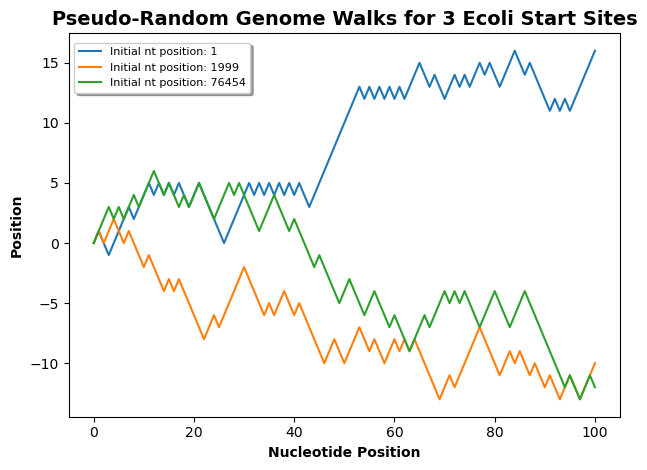

In [5]:
#Part 2: Plotting Line Plot of 3 Seperate Walks

E_COLI = genome_ingest()

PlotA = genome_walker(E_COLI, p = 1)
PlotB = genome_walker(E_COLI, p = 1999)
PlotC = genome_walker(E_COLI, p = 76454)

#Line plot (x3) and plot specifications/annotations
plt.plot(PlotA, label='Initial nt position: 1')
plt.plot(PlotB, label='Initial nt position: 1999')
plt.plot(PlotC, label='Initial nt position: 76454')
plt.xlabel('Nucleotide Position', fontweight='bold',)
plt.ylabel('Position', fontweight='bold',)
plt.title('Pseudo-Random Genome Walks for 3 Ecoli Start Sites', fontweight='bold', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(0, .99), shadow=True, fontsize='8')
plt.tight_layout() 
plt.show()


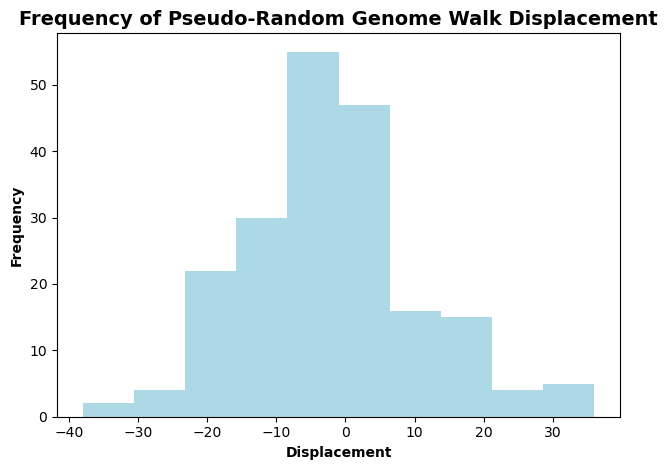

In [6]:
#Part 3: Plotting Histogram

multi_walk_displacements = [i[-1] for i in multi_genome_walker(200, E_COLI)] #this is taking the random walk displacements over one walk for 200 walks (i[-1] takes the final position from the history)

#Histogram creation and histogram specifications/annotations
plt.hist(multi_walk_displacements, color = 'lightblue')
plt.xlabel('Displacement', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.title('Frequency of Pseudo-Random Genome Walk Displacement', fontweight = 'bold', fontsize = 14)
plt.tight_layout() 

plt.show()

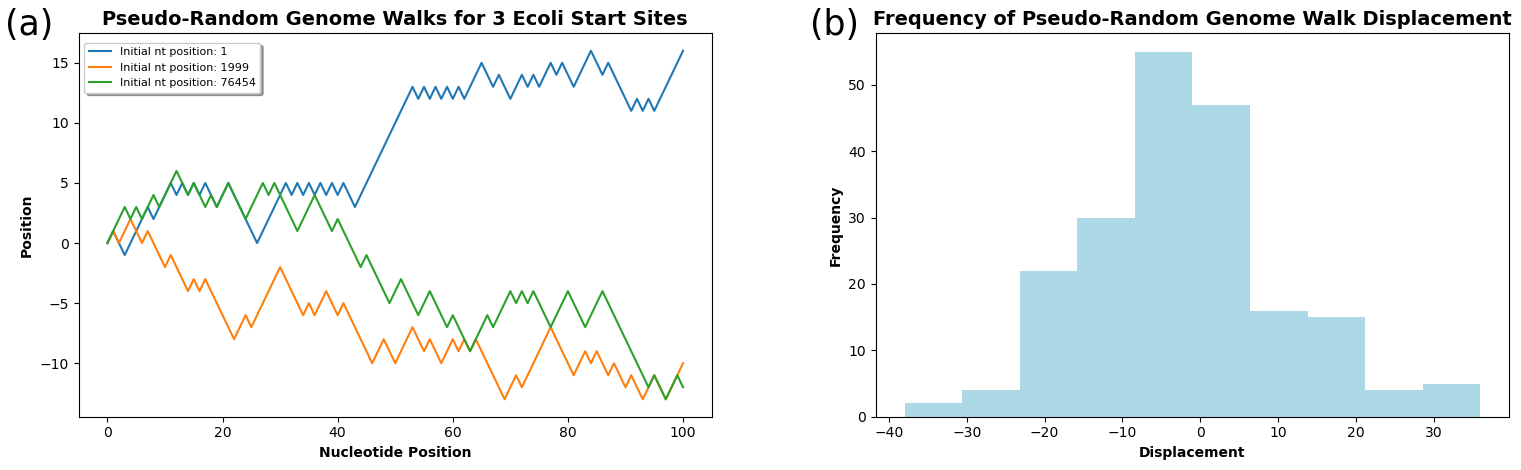

In [7]:
#Part 4: Plotting both together

#Figure (a)
plt.subplot(1, 2, 1)
plt.plot(PlotA, label='Initial nt position: 1')
plt.plot(PlotB, label='Initial nt position: 1999')
plt.plot(PlotC, label='Initial nt position: 76454')
plt.xlabel('Nucleotide Position', fontweight='bold',)
plt.ylabel('Position', fontweight='bold',)
plt.title('Pseudo-Random Genome Walks for 3 Ecoli Start Sites', fontweight='bold', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(0, .99), shadow=True, fontsize='8')
plt.tight_layout() 

#Figure (b)
plt.subplot(1, 2, 2)
plt.hist(multi_walk_displacements, color = 'lightblue')
plt.xlabel('Displacement', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Frequency of Pseudo-Random Genome Walk Displacement', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(right=2.35) #padding in between each plot

#annotations of figures
plt.annotate('(a)', xy=(0,0), xytext=(5,435), textcoords = 'figure pixels', fontsize = '25')
plt.annotate('(b)', xy=(0,0), xytext=(810,435), textcoords = 'figure pixels', fontsize = '25')

plt.show()

# Supplemental Work

In [8]:
E_coli_example = genome_ingest()

print(f'First 200 nucleotides of E.coli genome: {E_coli_example[:200]}') 

First 200 nucleotides of E.coli genome: ['A', 'G', 'C', 'T', 'T', 'T', 'T', 'C', 'A', 'T', 'T', 'C', 'T', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'A', 'C', 'G', 'G', 'G', 'C', 'A', 'A', 'T', 'A', 'T', 'G', 'T', 'C', 'T', 'C', 'T', 'G', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'T', 'C', 'T', 'G', 'A', 'T', 'A', 'G', 'C', 'A', 'G', 'C', 'T', 'T', 'C', 'T', 'G', 'A', 'A', 'C', 'T', 'G', 'G', 'T', 'T', 'A', 'C', 'C', 'T', 'G', 'C', 'C', 'G', 'T', 'G', 'A', 'G', 'T', 'A', 'A', 'A', 'T', 'T', 'A', 'A', 'A', 'A', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'G', 'A', 'C', 'T', 'T', 'A', 'G', 'G', 'T', 'C', 'A', 'C', 'T', 'A', 'A', 'A', 'T', 'A', 'C', 'T', 'T', 'T', 'A', 'A', 'C', 'C', 'A', 'A', 'T', 'A', 'T', 'A', 'G', 'G', 'C', 'A', 'T', 'A', 'G', 'C', 'G', 'C', 'A', 'C', 'A', 'G', 'A', 'C', 'A', 'G', 'A', 'T', 'A', 'A', 'A', 'A', 'A', 'T', 'T', 'A', 'C', 'A', 'G', 'A', 'G', 'T', 'A', 'C', 'A', 'C', 'A', 'A', 'C', 'A', 'T', 'C', 'C', 'A', 'T', 'G',

In [9]:
genome_walker_example = genome_walker(E_coli_example, p = 1)
genome_walker_example2 = genome_walker(E_coli_example, p = 891918) # random start position

print(f'X position history beginning at 1: {genome_walker_example}')
print()
print(f'X postion history beginning at 891918: {genome_walker_example2}')


X position history beginning at 1: [0, 1, 0, -1, 0, 1, 2, 3, 2, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 12, 13, 12, 13, 12, 13, 12, 13, 12, 13, 14, 15, 14, 13, 14, 13, 12, 13, 14, 13, 14, 13, 14, 15, 14, 15, 14, 13, 14, 15, 16, 15, 14, 15, 14, 13, 12, 11, 12, 11, 12, 11, 12, 13, 14, 15, 16]

X postion history beginning at 891918: [0, -1, -2, -1, 0, -1, 0, 1, 2, 1, 2, 3, 4, 3, 2, 1, 0, -1, -2, -3, -2, -1, 0, 1, 0, 1, 0, -1, 0, -1, -2, -1, -2, -1, -2, -1, -2, -1, -2, -1, -2, -1, -2, -3, -2, -3, -4, -3, -4, -5, -6, -5, -6, -5, -4, -3, -2, -1, 0, -1, -2, -3, -2, -1, 0, 1, 2, 1, 2, 1, 0, -1, -2, -3, -4, -3, -2, -3, -4, -3, -2, -3, -4, -5, -4, -5, -4, -3, -2, -1, -2, -3, -2, -3, -2, -1, 0, -1, -2, -3, -4]


In [10]:
multi_walk_displacements_example = multi_genome_walker(200, E_coli_example)

print(f'X position history of first 3 100bp movements: {multi_walk_displacements_example[:3]}')
print()

#Below print lines display that each walk is consecutive and accurate from the above multi_walk
print(f'First 100bp: {genome_walker(E_coli_example, p = 1)}')
print()
print(f'Second 100bp: {genome_walker(E_coli_example, p = 101)}')
print()
print(f'Third 100bp: {genome_walker(E_coli_example, p = 201)}')
print()

#what was actually used to plot histogram (only the displacement aka final value in each list)
multi_walk_displacements_example2 = [i[-1] for i in multi_genome_walker(200, E_coli_example)]

print(f'Final displacement values for each of 200 runs: {multi_walk_displacements_example2}')


X position history of first 3 100bp movements: [[0, 1, 0, -1, 0, 1, 2, 3, 2, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 12, 13, 12, 13, 12, 13, 12, 13, 12, 13, 14, 15, 14, 13, 14, 13, 12, 13, 14, 13, 14, 13, 14, 15, 14, 15, 14, 13, 14, 15, 16, 15, 14, 15, 14, 13, 12, 11, 12, 11, 12, 11, 12, 13, 14, 15, 16], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 11, 12, 11, 12, 13, 14, 13, 12, 13, 12, 13, 12, 13, 14, 15, 16, 17, 18, 17, 18, 19, 20, 21, 22, 21, 20, 21, 22, 23, 24, 25, 26, 25, 24, 23, 24, 25, 26, 25, 24, 23, 22, 23, 22, 23, 22, 23, 22, 23, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 31, 32, 31, 32, 31, 32, 33, 32, 33, 32, 33, 34, 33, 34, 35, 34, 33, 34, 35, 34, 35, 36, 37, 36, 35, 34, 35, 36], [0, 1, 2, 1, 0, 1, 0, -1, 0, -1, -2, -1, 0, 1, 2, 1, 0, 1, 0, -1, 0, -1, -2, -1, 0, -1, 0, -1, -2, -1, 0, 1, 2, 1, 0, 1, 0, 1, 0, -1, 0, 1, 2, 1, 0, -1, 0, -1, -2, -3, -4, -5, -6, -5, -6, -5, -6, -7,